Demo of Linear Gaussian System in inferring an unknown vector from noisy measurements

cf. Kevin Murphy MLaPP Sec. 4.4.2.2

Given $\hspace{3pt} \boldsymbol{x} \sim \mathcal{N} (\mu_0, \Sigma_0)$ and $\hspace{3pt} \boldsymbol{y_i} | \boldsymbol{x} \sim \mathcal{N}(\boldsymbol{x}, \boldsymbol{\Sigma_{y_i}})$

The posterior can be written as 

$
\begin{equation}
\begin{array}{r c l}
p(x|, y_1, y_2, \dots, y_N) &=& \mathcal{N}(x \hspace{2pt} | \hspace{2pt} \mu_{x | y}, \Sigma_{x|y}) \\
&& \\
\text{where} && \\
&& \\
\Sigma_{x|y}^{-1} &=& \Sigma_0^{-1} + \big[\Sigma^{-1}_{y_1} + \Sigma^{-1}_{y_2} + \dots + \Sigma^{-1}_{y_N} \big] \\
&& \\
\mu_{x | y} &=& \Sigma_{x | y} \big[ \Sigma_{0}^{-1} \mu_0 + (\Sigma^{-1}_{y_1} y_1 + \Sigma^{-1}_{y_2} y_2 + \dots + \Sigma^{-1}_{y_N} y_N) \big]
\end{array}
\end{equation}
$


Example 1.

Below is a 2D system to demonstrate the above formula, assuming that the $\boldsymbol{x}$ is already known $\boldsymbol{x} = [0.5, 0.5]^T$ and the measurements $\boldsymbol{y_i} \sim \mathcal{N}(x, \Sigma_y{_i})$, where $\Sigma_y{_i} = 0.5 \begin{bmatrix} 2 \hspace{3pt} 1 \\ 1 \hspace{3pt} 1 \end{bmatrix}$.

In [113]:
import numpy as np
import matplotlib
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [109]:
mu_0 = np.array([0, 0])
sigma_0 = 0.1 * np.array([[1, 0], [0, 1]])
x = np.array([0.5, 0.5])

N = 10
sigma_y = 0.5 * np.array([[2, 1], [1, 1]])
ys = np.random.multivariate_normal(x, sigma_0, size=N)

sigma_y_list = []
for i in range(N): 
    sigma_y_list.append(sigma_y)

In [98]:
def gaussianInference(mu_0, sigma_0, observations, obs_sigmas):
    N = len(observations)
    lambda_0 = np.linalg.inv(sigma_0)
    lambda_N = lambda_0.copy()
    mu_N = lambda_0.dot(mu_0)    
    for i in range(N):
        inv_sigma = np.linalg.inv(obs_sigmas[i])
        lambda_N += inv_sigma
        mu_N += inv_sigma.dot(observations[i])
    sigma_N = np.linalg.inv(lambda_N)
    mu_N = sigma_N.dot(mu_N)
    return mu_N, sigma_N

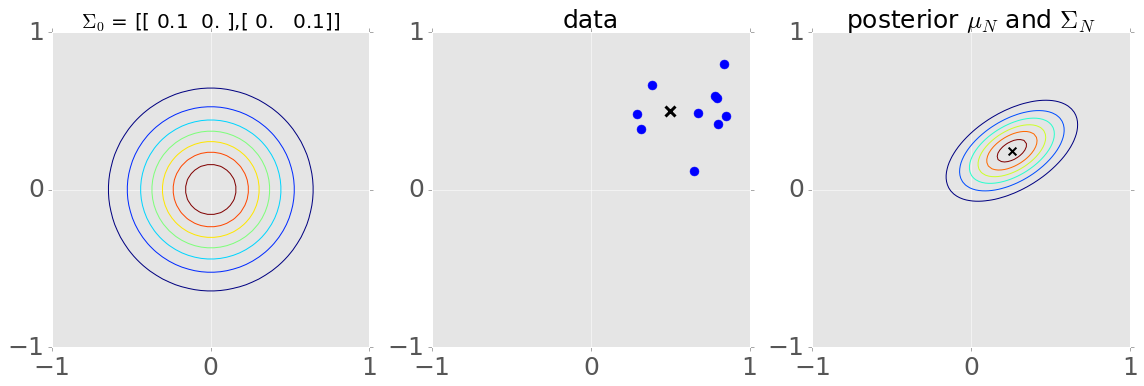

In [115]:
FONTSIZE = 25
plt.close('all')
fig = plt.figure(figsize=(16, 5.5))
gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[0.9, 0.9, 0.9])


# Plot prior
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = bivariate_normal(X1, X2, np.sqrt(sigma_0[0,0]), np.sqrt(sigma_0[1,1]), mu_0[0], mu_0[1], sigma_0[0, 1])
        
ax = plt.subplot(gs[0, 0])
ax.contour(X1, X2, Z)
        
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.xaxis.set_ticks(np.linspace(-1, 1, 3))
ax.yaxis.set_ticks(np.linspace(-1, 1, 3))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_title((r'$\Sigma_0$ = [{0:},{1:}]'.format(sigma_0[0,:], sigma_0[1,:])), fontsize=FONTSIZE*0.8)

             
# Plot likelihood
ax = plt.subplot(gs[0, 1])
ax.scatter(x[0], x[1], color='k', marker='x', s=100, lw=3)
ax.scatter(ys[:,0], ys[:,1], color='b', marker='o', s=80)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.xaxis.set_ticks(np.linspace(-1, 1, 3))     
ax.yaxis.set_ticks(np.linspace(-1, 1, 3))    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
ax.set_title('data', fontsize=FONTSIZE)
    

# plot posterior
mu_N, sigma_N = gaussianInference(mu_0, sigma_0, ys, sigma_y_list)
             
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)

Z = bivariate_normal(X1, X2, np.sqrt(sigma_N[0,0]), np.sqrt(sigma_N[1,1]), mu_N[0], mu_N[1], sigma_N[0, 1])

ax = plt.subplot(gs[0, 2])
ax.contour(X1, X2, Z)
ax.scatter(mu_N[0], mu_N[1], color='k', marker='x', s=60, lw=2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.xaxis.set_ticks(np.linspace(-1, 1, 3))
ax.yaxis.set_ticks(np.linspace(-1, 1, 3))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_title(r'posterior $\mu_N$ and $\Sigma_N$', fontsize=FONTSIZE)


plt.tight_layout(w_pad=1, h_pad=1)